<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Graficos_SPOTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

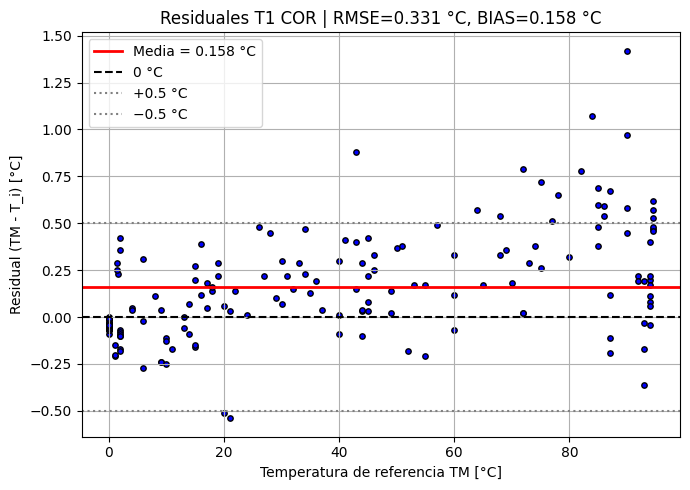

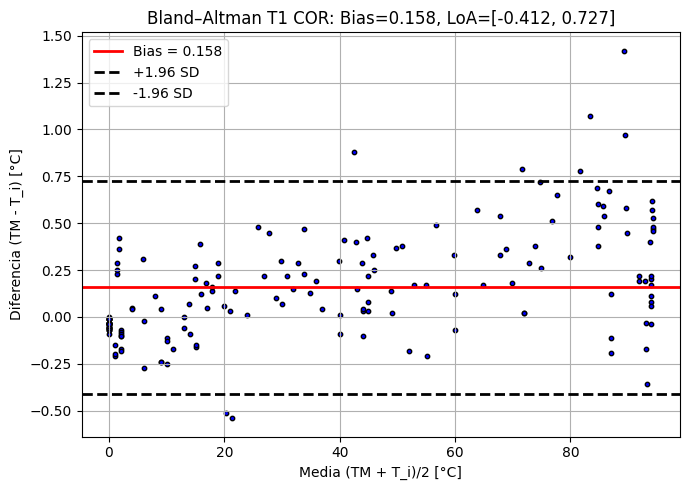

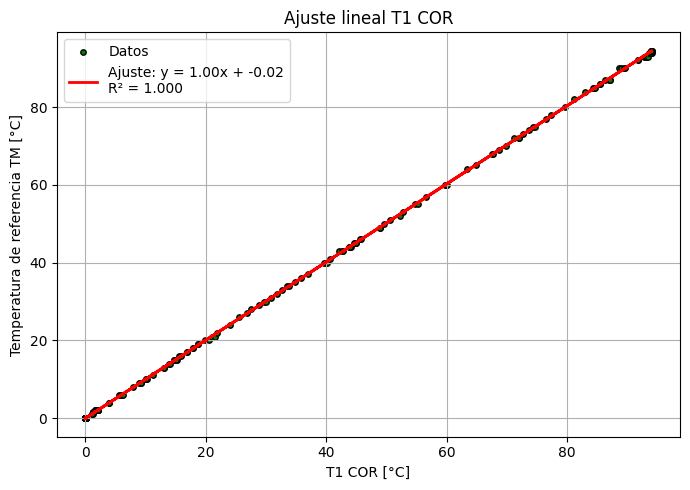

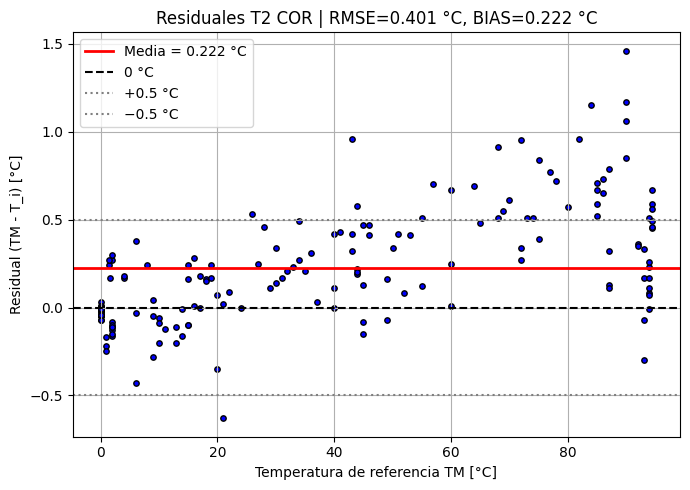

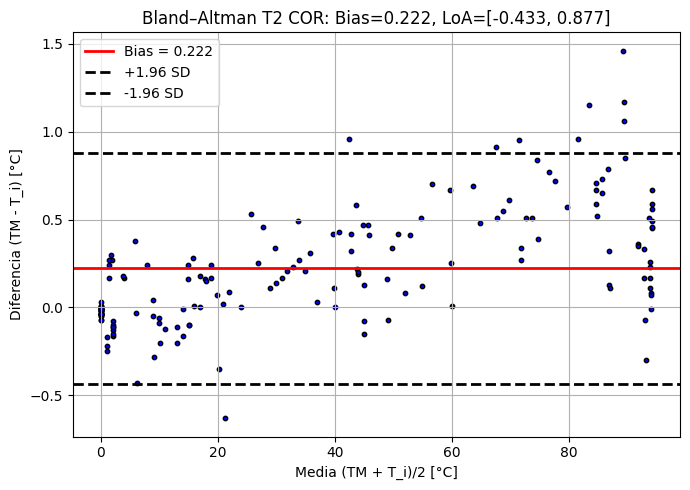

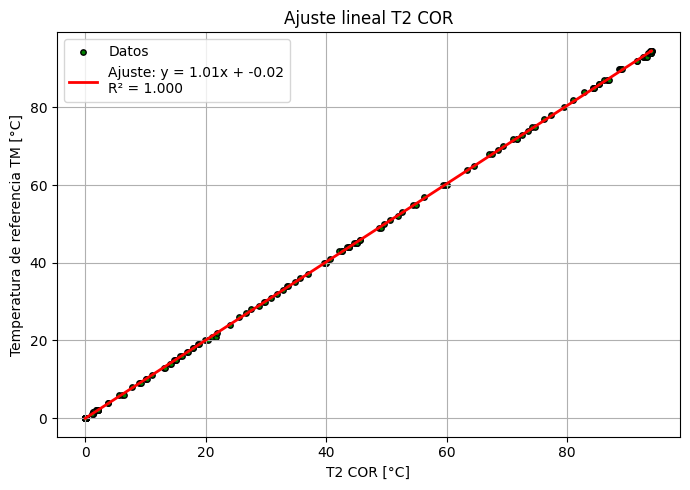

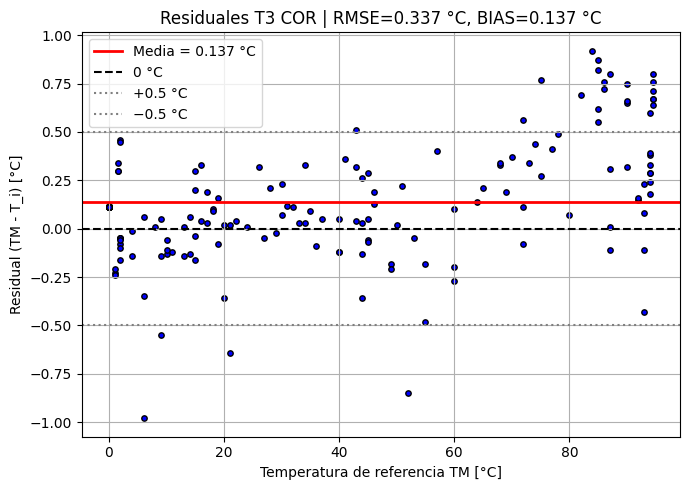

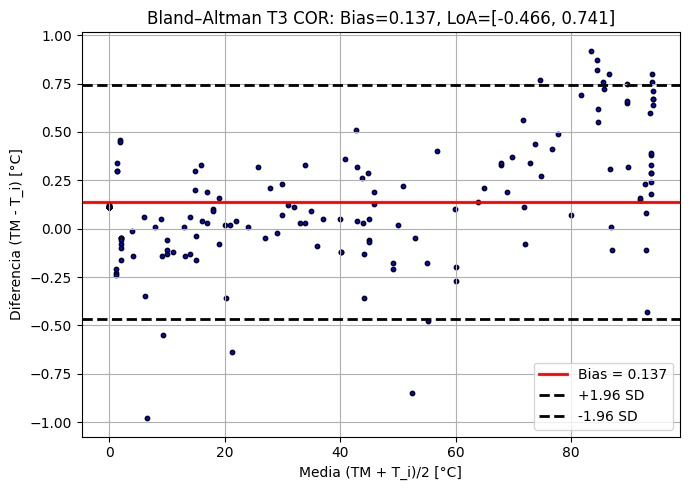

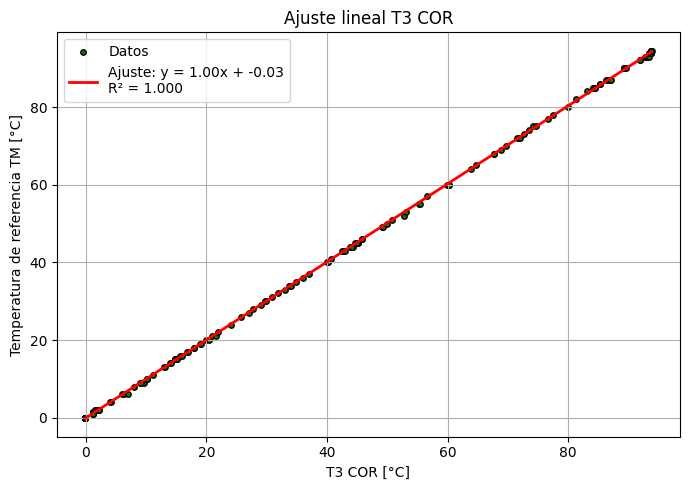

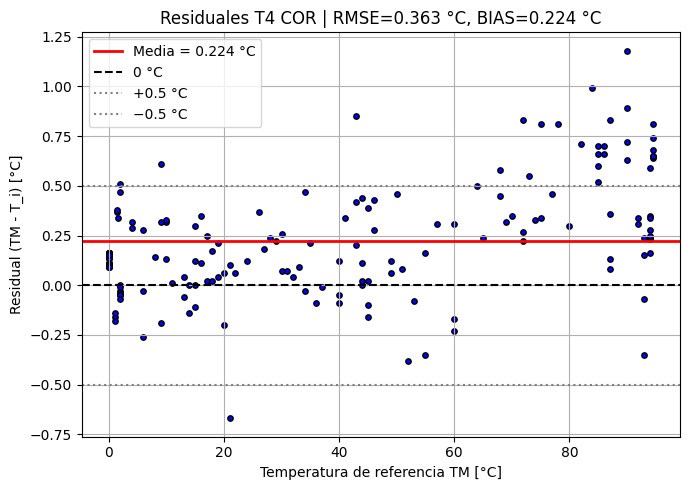

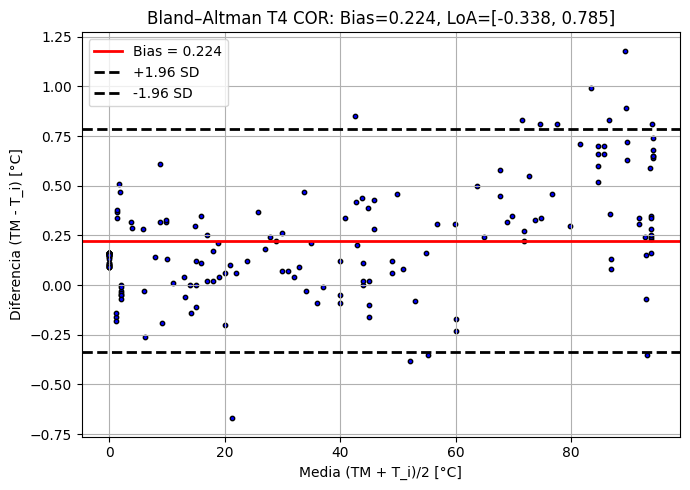

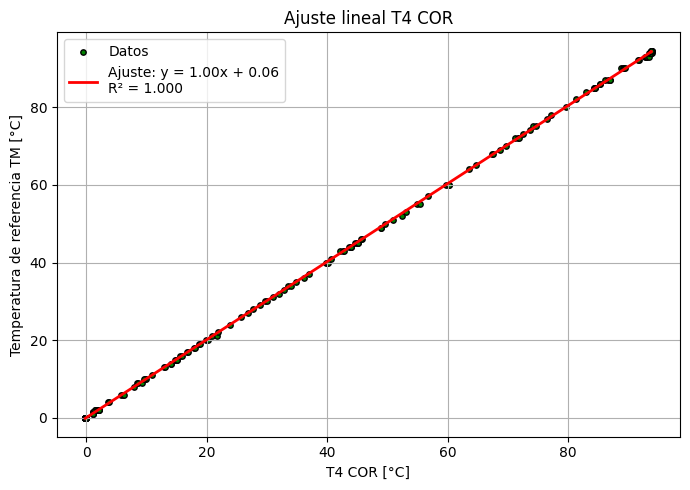


Resumen de métricas por sensor:
Sensor     RMSE     BIAS      STD    Slope  Intercept       R2
T1 COR 0.330618 0.157630 0.290622 1.004520  -0.018096 0.999949
T2 COR 0.401093 0.221908 0.334115 1.006198  -0.018685 0.999944
T3 COR 0.337169 0.137283 0.307954 1.004333  -0.031287 0.999939
T4 COR 0.363251 0.223584 0.286290 1.004119   0.063704 0.999948


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === (1) Cargar datos ===
ruta_csv = 'DATOS3.csv'  # Cambia este nombre si usas otro archivo
df = pd.read_csv(ruta_csv)

# === (2) Extraer columnas ===
TM = df.iloc[:, 0].values                            # Temperatura de referencia
T = df.iloc[:, 1:5].values                           # Sensores corregidos T1 COR - T4 COR
Tnames = df.columns[1:5].tolist()                    # Nombres de los sensores

# === (3) Inicializar métricas ===
nS = T.shape[1]
RMSE_direct = np.zeros(nS)
BIAS_direct = np.zeros(nS)
STD_direct  = np.zeros(nS)
slopes = np.zeros(nS)
intercepts = np.zeros(nS)
R2_scores = np.zeros(nS)

# === (4) Calcular métricas y graficar ===
for k in range(nS):
    Ti = T[:, k]
    r = TM - Ti  # Residual directo

    # --- Métricas ---
    RMSE_direct[k] = np.sqrt(np.mean(r**2))
    BIAS_direct[k] = np.mean(r)
    STD_direct[k]  = np.std(r, ddof=0)

    # --- Ajuste lineal ---
    model = LinearRegression()
    model.fit(Ti.reshape(-1, 1), TM)  # Ajuste de Ti para predecir TM
    TM_pred = model.predict(Ti.reshape(-1, 1))
    slopes[k] = model.coef_[0]
    intercepts[k] = model.intercept_
    R2_scores[k] = model.score(Ti.reshape(-1, 1), TM)

       # --- Gráfico de residuales ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(TM, r, s=15, c='blue', edgecolors='black')

    # Línea de la media (BIAS)
    plt.axhline(np.mean(r), color='red', linewidth=2,
                label=f'Media = {BIAS_direct[k]:.3f} °C')

    # Línea base en 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label='0 °C')

    # Líneas de tolerancia ±0.5 °C
    plt.axhline(0.5, color='gray', linestyle=':', linewidth=1.5, label='+0.5 °C')
    plt.axhline(-0.5, color='gray', linestyle=':', linewidth=1.5, label='−0.5 °C')

    plt.xlabel('Temperatura de referencia TM [°C]')
    plt.ylabel('Residual (TM - T_i) [°C]')
    plt.title(f'Residuales {Tnames[k]} | RMSE={RMSE_direct[k]:.3f} °C, BIAS={BIAS_direct[k]:.3f} °C')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de Bland–Altman ---
    D = TM - Ti
    M = (TM + Ti) / 2
    bias = np.mean(D)
    sdD = np.std(D, ddof=0)
    loaU = bias + 1.96 * sdD
    loaL = bias - 1.96 * sdD

    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(M, D, s=10, c='blue', edgecolors='black')
    plt.axhline(bias, color='red', linewidth=2, label=f'Bias = {bias:.3f}')
    plt.axhline(loaU, color='black', linestyle='--', linewidth=2, label='+1.96 SD')
    plt.axhline(loaL, color='black', linestyle='--', linewidth=2, label='-1.96 SD')

    plt.xlabel('Media (TM + T_i)/2 [°C]')
    plt.ylabel('Diferencia (TM - T_i) [°C]')
    plt.title(f'Bland–Altman {Tnames[k]}: Bias={bias:.3f}, LoA=[{loaL:.3f}, {loaU:.3f}]')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de ajuste lineal ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(Ti, TM, s=15, c='green', edgecolors='black', label='Datos')
    plt.plot(Ti, TM_pred, 'r-', linewidth=2,
             label=f'Ajuste: y = {slopes[k]:.2f}x + {intercepts[k]:.2f}\nR² = {R2_scores[k]:.3f}')

    plt.xlabel(f'{Tnames[k]} [°C]')
    plt.ylabel('Temperatura de referencia TM [°C]')
    plt.title(f'Ajuste lineal {Tnames[k]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# === (5) Tabla resumen ===
resumen = pd.DataFrame({
    'Sensor': Tnames,
    'RMSE': RMSE_direct,
    'BIAS': BIAS_direct,
    'STD': STD_direct,
    'Slope': slopes,
    'Intercept': intercepts,
    'R2': R2_scores
})

print("\nResumen de métricas por sensor:")
print(resumen.to_string(index=False))


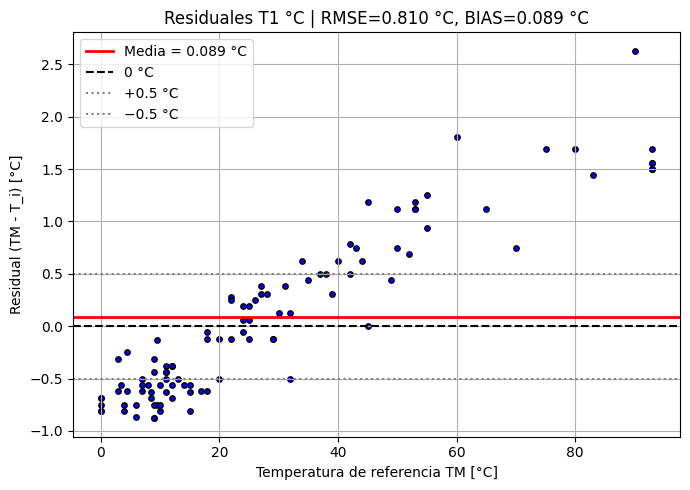

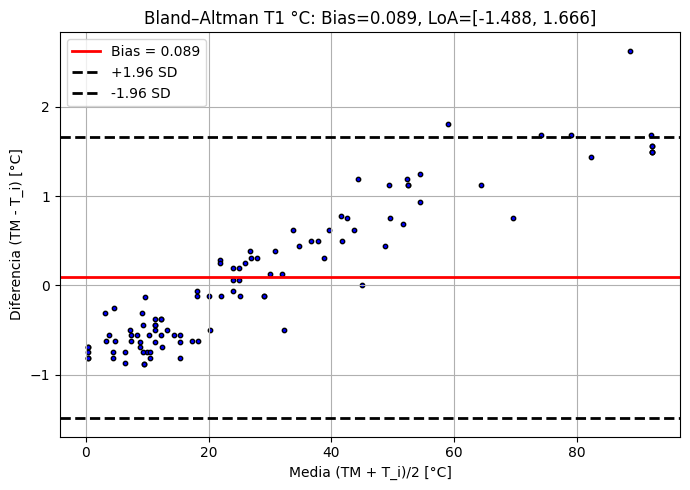

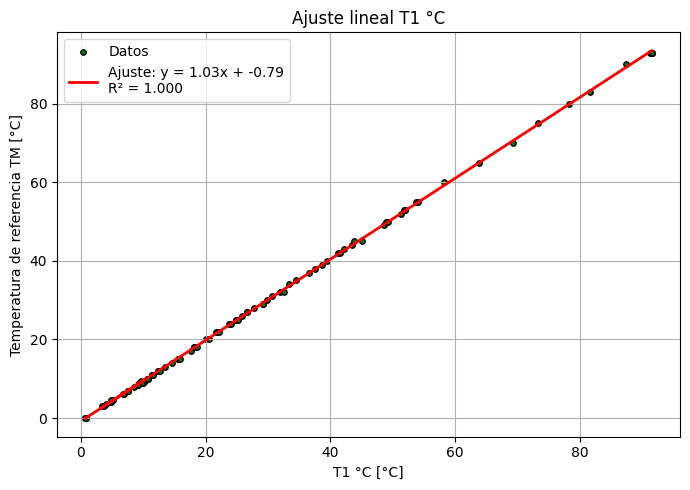

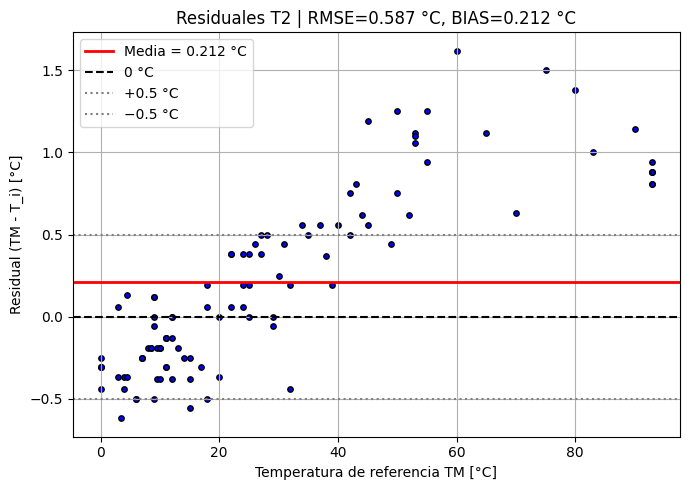

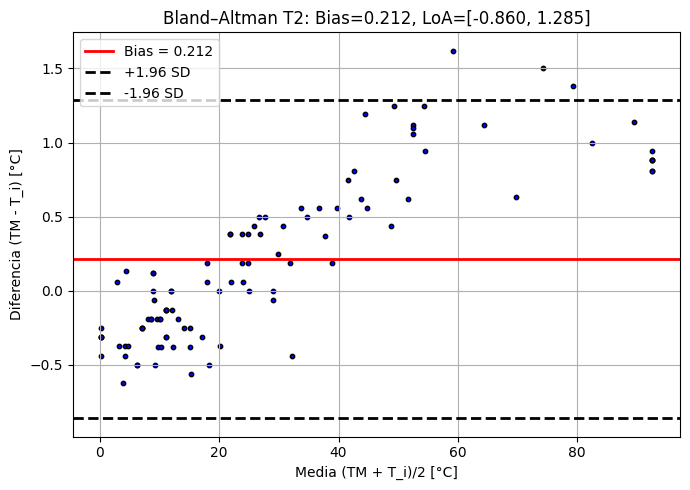

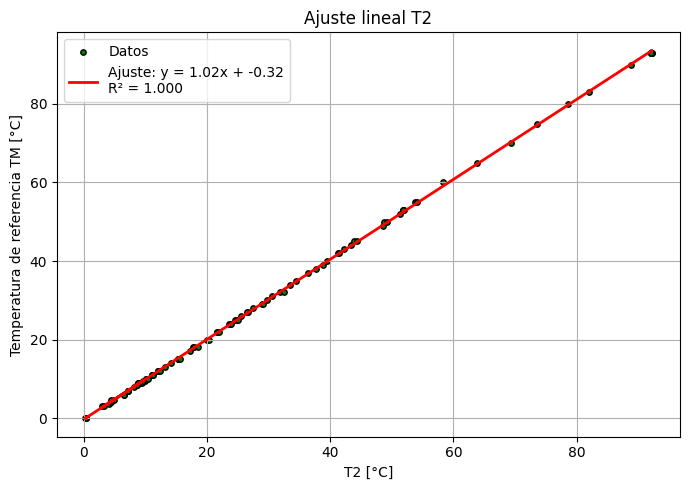

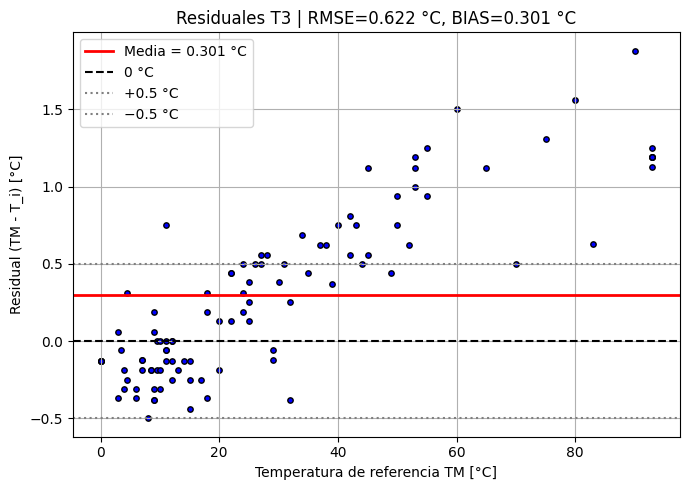

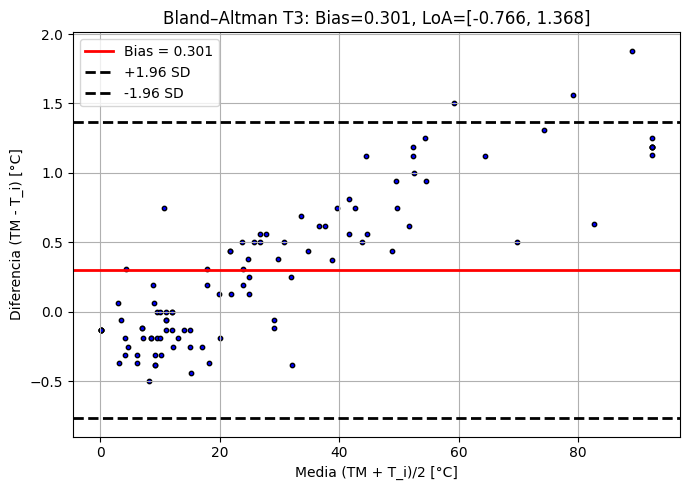

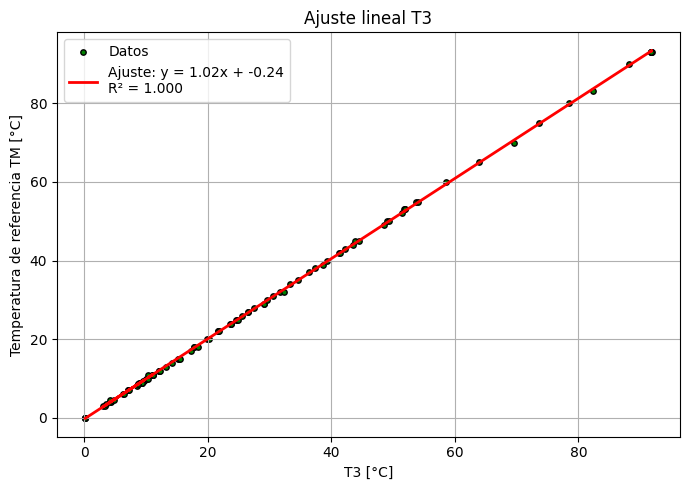

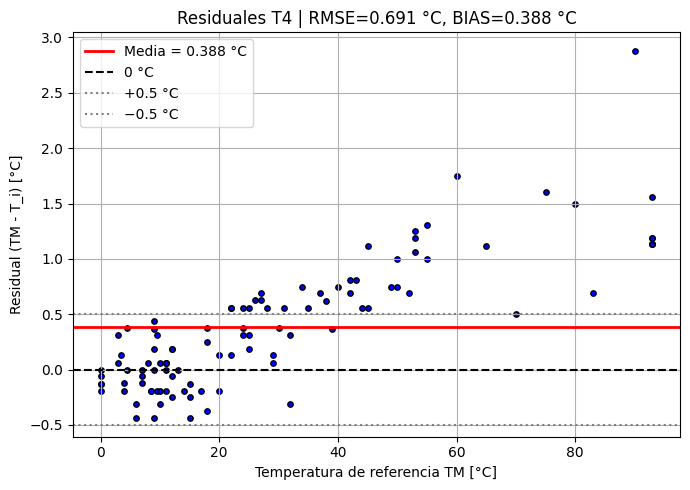

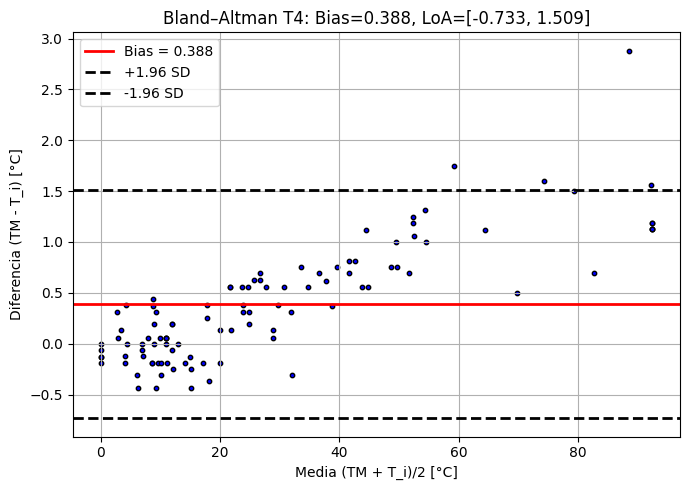

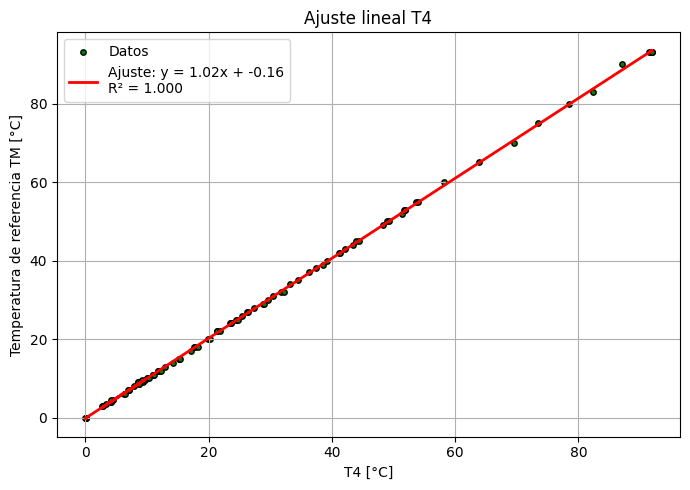


Resumen de métricas por sensor:
Sensor     RMSE     BIAS      STD    Slope  Intercept       R2
 T1 °C 0.809571 0.088932 0.804672 1.030148  -0.787516 0.999869
    T2 0.587008 0.212233 0.547299 1.018278  -0.316868 0.999866
    T3 0.621879 0.300777 0.544304 1.018640  -0.237162 0.999883
    T4 0.691076 0.388058 0.571836 1.018875  -0.155014 0.999845


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === (1) Cargar datos ===
ruta_csv = 'DATOS4.csv'  # Cambia este nombre si usas otro archivo
df = pd.read_csv(ruta_csv, encoding='latin1')

# === (2) Extraer columnas ===
TM = df.iloc[:, 0].values                            # Temperatura de referencia
T = df.iloc[:, 1:5].values                           # Sensores corregidos T1 COR - T4 COR
Tnames = df.columns[1:5].tolist()                    # Nombres de los sensores

# === (3) Inicializar métricas ===
nS = T.shape[1]
RMSE_direct = np.zeros(nS)
BIAS_direct = np.zeros(nS)
STD_direct  = np.zeros(nS)
slopes = np.zeros(nS)
intercepts = np.zeros(nS)
R2_scores = np.zeros(nS)

# === (4) Calcular métricas y graficar ===
for k in range(nS):
    Ti = T[:, k]
    r = TM - Ti  # Residual directo

    # --- Métricas ---
    RMSE_direct[k] = np.sqrt(np.mean(r**2))
    BIAS_direct[k] = np.mean(r)
    STD_direct[k]  = np.std(r, ddof=0)

    # --- Ajuste lineal ---
    model = LinearRegression()
    model.fit(Ti.reshape(-1, 1), TM)  # Ajuste de Ti para predecir TM
    TM_pred = model.predict(Ti.reshape(-1, 1))
    slopes[k] = model.coef_[0]
    intercepts[k] = model.intercept_
    R2_scores[k] = model.score(Ti.reshape(-1, 1), TM)

       # --- Gráfico de residuales ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(TM, r, s=15, c='blue', edgecolors='black')

    # Línea de la media (BIAS)
    plt.axhline(np.mean(r), color='red', linewidth=2,
                label=f'Media = {BIAS_direct[k]:.3f} °C')

    # Línea base en 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label='0 °C')

    # Líneas de tolerancia ±0.5 °C
    plt.axhline(0.5, color='gray', linestyle=':', linewidth=1.5, label='+0.5 °C')
    plt.axhline(-0.5, color='gray', linestyle=':', linewidth=1.5, label='−0.5 °C')

    plt.xlabel('Temperatura de referencia TM [°C]')
    plt.ylabel('Residual (TM - T_i) [°C]')
    plt.title(f'Residuales {Tnames[k]} | RMSE={RMSE_direct[k]:.3f} °C, BIAS={BIAS_direct[k]:.3f} °C')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de Bland–Altman ---
    D = TM - Ti
    M = (TM + Ti) / 2
    bias = np.mean(D)
    sdD = np.std(D, ddof=0)
    loaU = bias + 1.96 * sdD
    loaL = bias - 1.96 * sdD

    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(M, D, s=10, c='blue', edgecolors='black')
    plt.axhline(bias, color='red', linewidth=2, label=f'Bias = {bias:.3f}')
    plt.axhline(loaU, color='black', linestyle='--', linewidth=2, label='+1.96 SD')
    plt.axhline(loaL, color='black', linestyle='--', linewidth=2, label='-1.96 SD')

    plt.xlabel('Media (TM + T_i)/2 [°C]')
    plt.ylabel('Diferencia (TM - T_i) [°C]')
    plt.title(f'Bland–Altman {Tnames[k]}: Bias={bias:.3f}, LoA=[{loaL:.3f}, {loaU:.3f}]')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de ajuste lineal ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(Ti, TM, s=15, c='green', edgecolors='black', label='Datos')
    plt.plot(Ti, TM_pred, 'r-', linewidth=2,
             label=f'Ajuste: y = {slopes[k]:.2f}x + {intercepts[k]:.2f}\nR² = {R2_scores[k]:.3f}')

    plt.xlabel(f'{Tnames[k]} [°C]')
    plt.ylabel('Temperatura de referencia TM [°C]')
    plt.title(f'Ajuste lineal {Tnames[k]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# === (5) Tabla resumen ===
resumen = pd.DataFrame({
    'Sensor': Tnames,
    'RMSE': RMSE_direct,
    'BIAS': BIAS_direct,
    'STD': STD_direct,
    'Slope': slopes,
    'Intercept': intercepts,
    'R2': R2_scores
})

print("\nResumen de métricas por sensor:")
print(resumen.to_string(index=False))

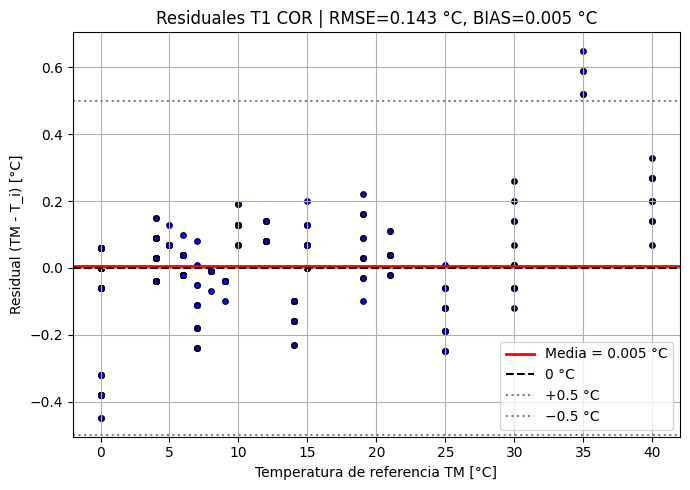

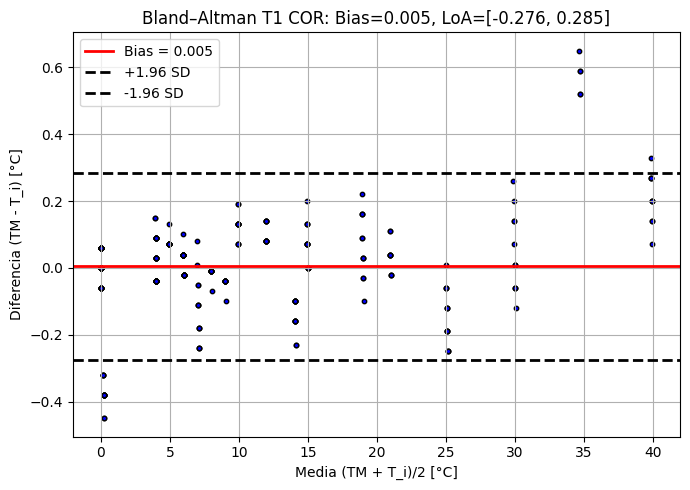

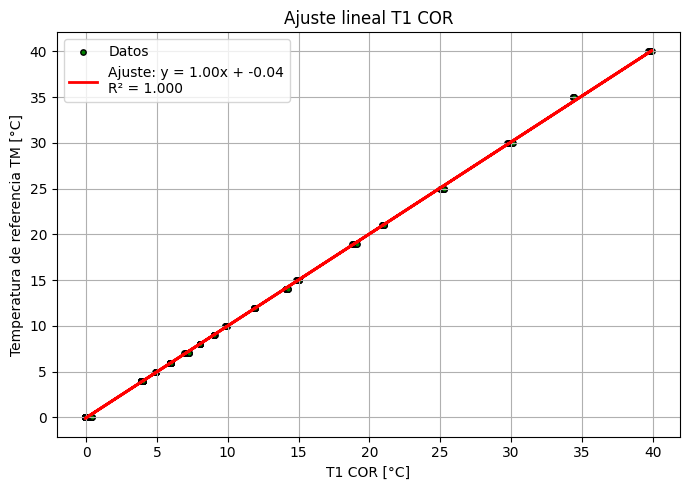

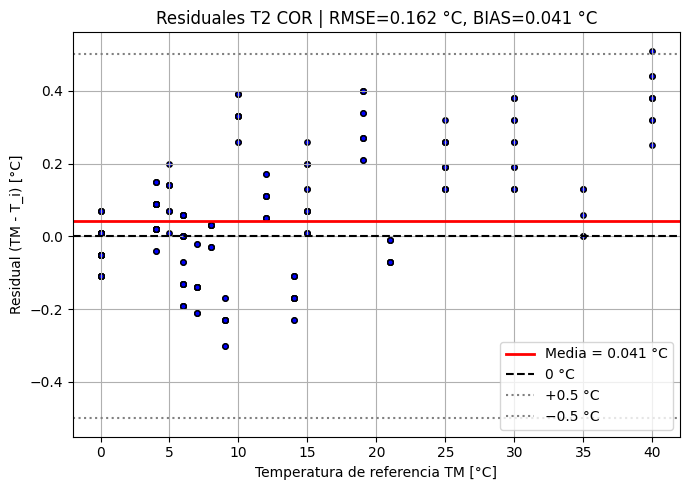

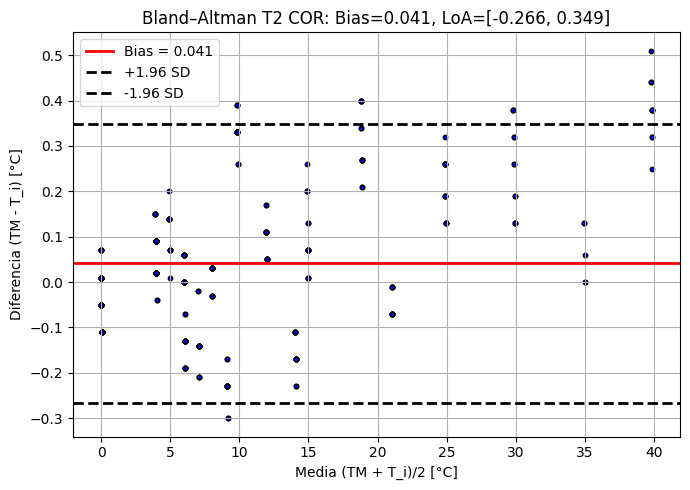

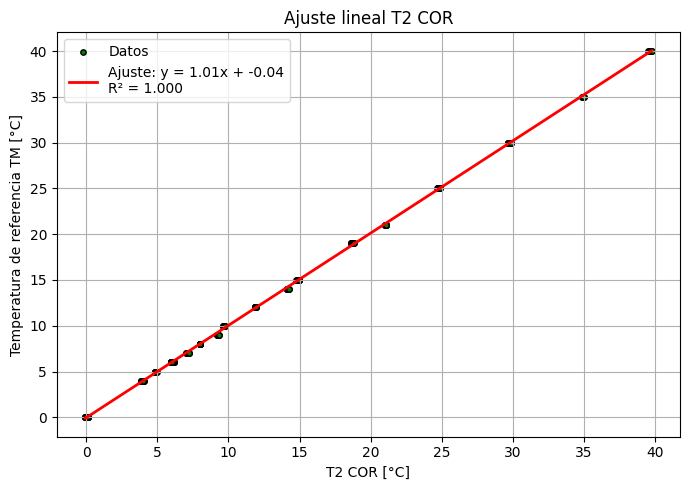

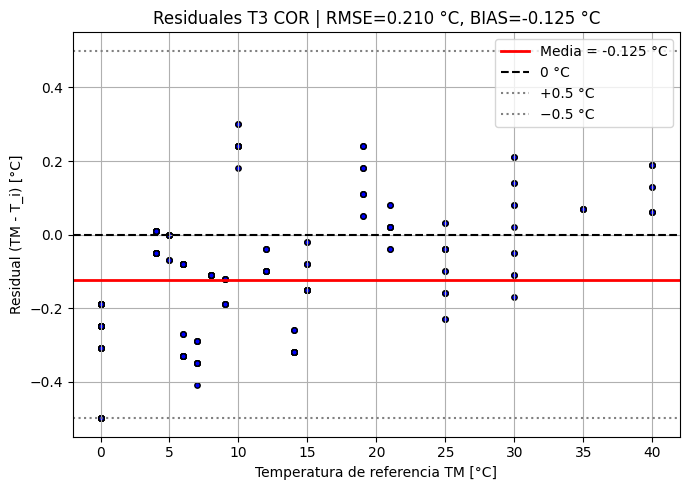

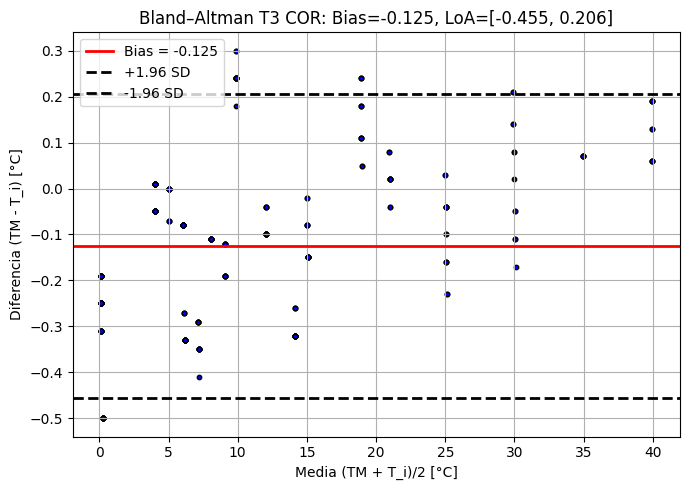

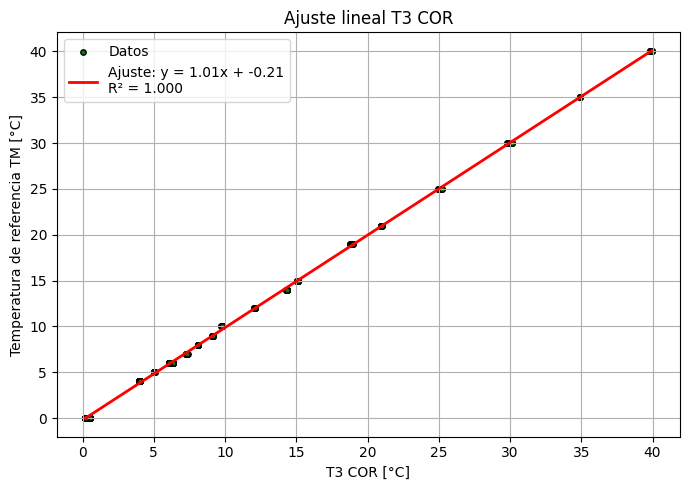

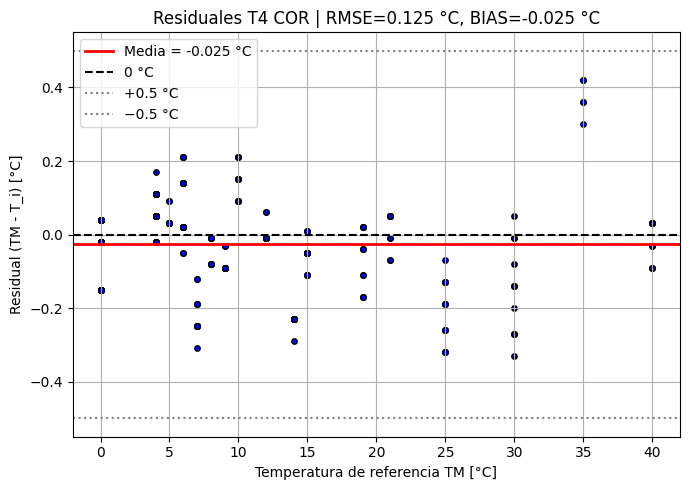

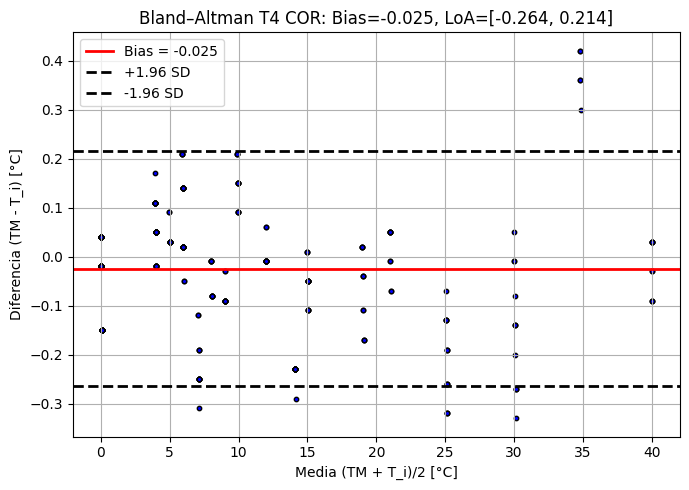

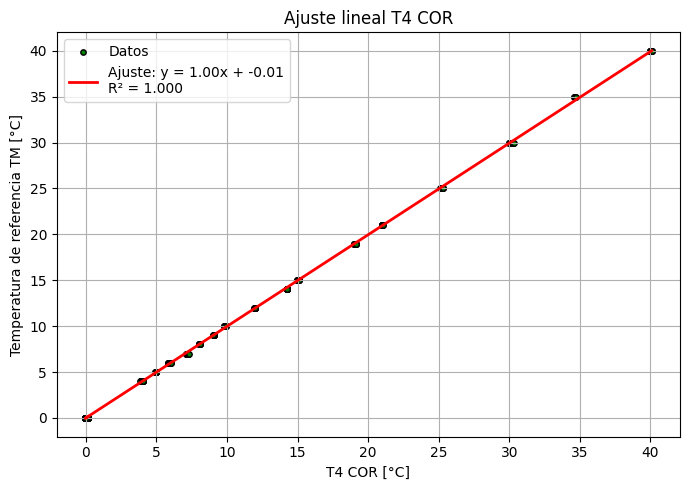


Resumen de métricas por sensor:
Sensor     RMSE      BIAS      STD    Slope  Intercept       R2
T1 COR 0.143097  0.004500 0.143027 1.004827  -0.042332 0.999830
T2 COR 0.162146  0.041438 0.156762 1.008133  -0.037169 0.999833
T3 COR 0.209823 -0.124687 0.168756 1.008688  -0.210099 0.999805
T4 COR 0.124648 -0.024969 0.122122 0.998290  -0.008332 0.999862


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === (1) Cargar datos ===
ruta_csv = 'DATOS5.csv'  # Cambia este nombre si usas otro archivo
# Specify the encoding to handle potential issues with characters
df = pd.read_csv(ruta_csv, encoding='latin1')

# === (2) Extraer columnas ===
TM = df.iloc[:, 0].values                            # Temperatura de referencia
T = df.iloc[:, 1:5].values                           # Sensores corregidos T1 COR - T4 COR
Tnames = df.columns[1:5].tolist()                    # Nombres de los sensores

# === (3) Inicializar métricas ===
nS = T.shape[1]
RMSE_direct = np.zeros(nS)
BIAS_direct = np.zeros(nS)
STD_direct  = np.zeros(nS)
slopes = np.zeros(nS)
intercepts = np.zeros(nS)
R2_scores = np.zeros(nS)

# === (4) Calcular métricas y graficar ===
for k in range(nS):
    Ti = T[:, k]
    r = TM - Ti  # Residual directo

    # --- Métricas ---
    RMSE_direct[k] = np.sqrt(np.mean(r**2))
    BIAS_direct[k] = np.mean(r)
    STD_direct[k]  = np.std(r, ddof=0)

    # --- Ajuste lineal ---
    model = LinearRegression()
    model.fit(Ti.reshape(-1, 1), TM)  # Ajuste de Ti para predecir TM
    TM_pred = model.predict(Ti.reshape(-1, 1))
    slopes[k] = model.coef_[0]
    intercepts[k] = model.intercept_
    R2_scores[k] = model.score(Ti.reshape(-1, 1), TM)

       # --- Gráfico de residuales ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(TM, r, s=15, c='blue', edgecolors='black')

    # Línea de la media (BIAS)
    plt.axhline(np.mean(r), color='red', linewidth=2,
                label=f'Media = {BIAS_direct[k]:.3f} °C')

    # Línea base en 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1.5, label='0 °C')

    # Líneas de tolerancia ±0.5 °C
    plt.axhline(0.5, color='gray', linestyle=':', linewidth=1.5, label='+0.5 °C')
    plt.axhline(-0.5, color='gray', linestyle=':', linewidth=1.5, label='−0.5 °C')

    plt.xlabel('Temperatura de referencia TM [°C]')
    plt.ylabel('Residual (TM - T_i) [°C]')
    plt.title(f'Residuales {Tnames[k]} | RMSE={RMSE_direct[k]:.3f} °C, BIAS={BIAS_direct[k]:.3f} °C')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de Bland–Altman ---
    D = TM - Ti
    M = (TM + Ti) / 2
    bias = np.mean(D)
    sdD = np.std(D, ddof=0)
    loaU = bias + 1.96 * sdD
    loaL = bias - 1.96 * sdD

    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(M, D, s=10, c='blue', edgecolors='black')
    plt.axhline(bias, color='red', linewidth=2, label=f'Bias = {bias:.3f}')
    plt.axhline(loaU, color='black', linestyle='--', linewidth=2, label='+1.96 SD')
    plt.axhline(loaL, color='black', linestyle='--', linewidth=2, label='-1.96 SD')

    plt.xlabel('Media (TM + T_i)/2 [°C]')
    plt.ylabel('Diferencia (TM - T_i) [°C]')
    plt.title(f'Bland–Altman {Tnames[k]}: Bias={bias:.3f}, LoA=[{loaL:.3f}, {loaU:.3f}]')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Gráfico de ajuste lineal ---
    plt.figure(figsize=(7, 5))
    plt.grid(True)
    plt.box(True)

    plt.scatter(Ti, TM, s=15, c='green', edgecolors='black', label='Datos')
    plt.plot(Ti, TM_pred, 'r-', linewidth=2,
             label=f'Ajuste: y = {slopes[k]:.2f}x + {intercepts[k]:.2f}\nR² = {R2_scores[k]:.3f}')

    plt.xlabel(f'{Tnames[k]} [°C]')
    plt.ylabel('Temperatura de referencia TM [°C]')
    plt.title(f'Ajuste lineal {Tnames[k]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# === (5) Tabla resumen ===
resumen = pd.DataFrame({
    'Sensor': Tnames,
    'RMSE': RMSE_direct,
    'BIAS': BIAS_direct,
    'STD': STD_direct,
    'Slope': slopes,
    'Intercept': intercepts,
    'R2': R2_scores
})

print("\nResumen de métricas por sensor:")
print(resumen.to_string(index=False))

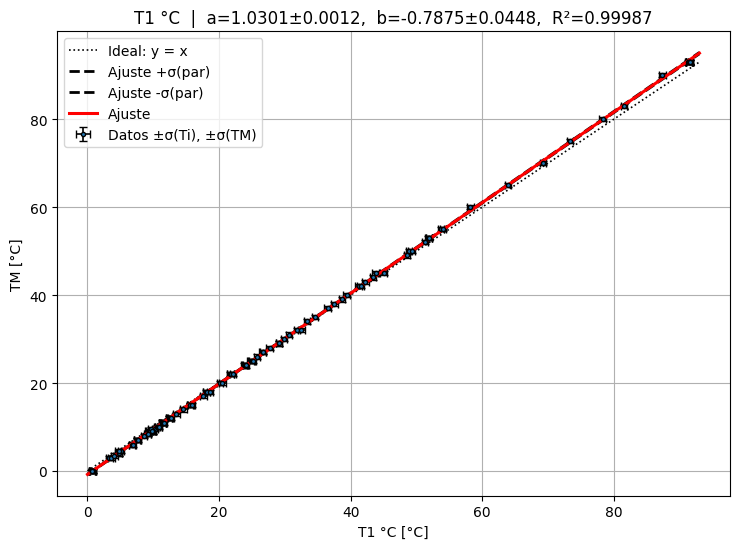

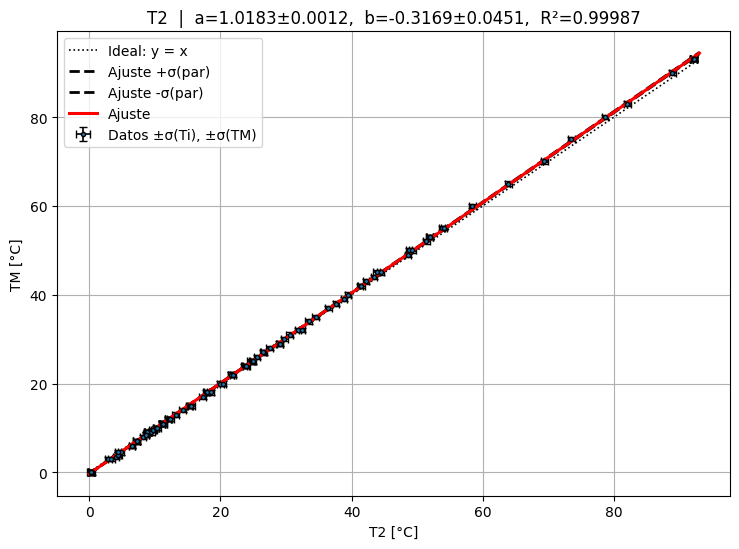

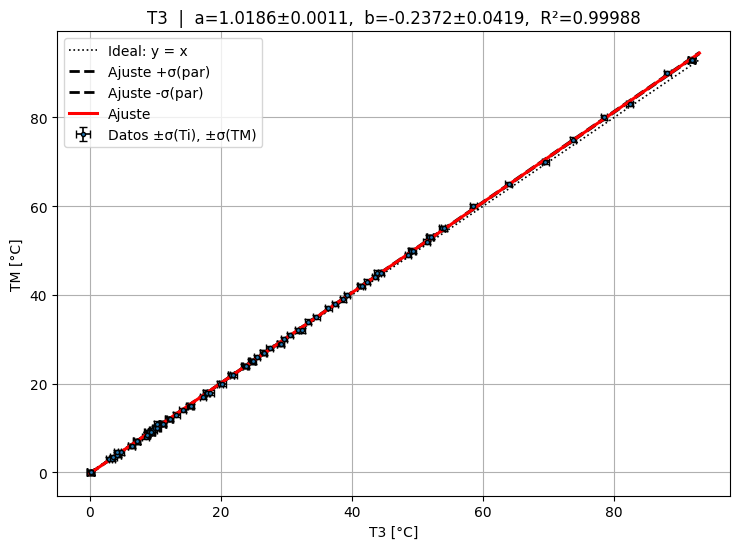

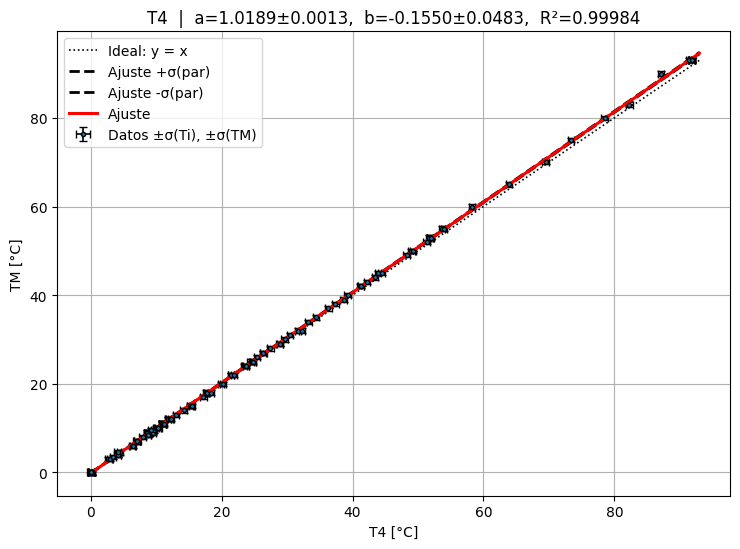

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === Cargar datos (solo 1..7) ===
ruta_csv = 'DATOS4.csv'   # <-- cambia si usas otro archivo
df = pd.read_csv(ruta_csv, encoding='latin1')
df = df.iloc[:, :7].dropna()           # usar solo 7 columnas y limpiar filas

TM = df.iloc[:, 0].to_numpy()          # referencia
T  = df.iloc[:, 1:5].to_numpy()        # T1..T4
sigY = df.iloc[:, 5].to_numpy()        # INCERTIDUMBRE EN TM (col 6)
sigX = df.iloc[:, 6].to_numpy()        # INCERTIDUMBRE EN Ti (col 7)
Tnames = df.columns[1:5].tolist()

nS = T.shape[1]
N  = TM.size

def ols_se_slope_intercept(x, y):
    """Devuelve (a, b, sa, sb, R2) para y ~ a*x + b por OLS."""
    # Ajuste
    a, b = np.polyfit(x, y, 1)
    yhat = a*x + b
    resid = y - yhat
    ss_res = np.sum(resid**2)
    ss_tot = np.sum((y - y.mean())**2)
    R2 = 1 - ss_res / (ss_tot if ss_tot != 0 else np.finfo(float).eps)
    # Varianza residual y covarianza de parámetros
    X = np.column_stack((x, np.ones_like(x)))
    s2 = ss_res / max(N - 2, 1)
    XtX = X.T @ X
    C = s2 * np.linalg.inv(XtX)
    sa = np.sqrt(max(C[0, 0], 0.0))
    sb = np.sqrt(max(C[1, 1], 0.0))
    return a, b, sa, sb, R2

# === Gráficos lineales TM vs Ti con barras e incertidumbre de parámetros ===
for k in range(nS):
    x = T[:, k]
    y = TM

    # OLS y sigmas de parámetros
    a, b, sa, sb, R2 = ols_se_slope_intercept(x, y)

    # Rango de la gráfica
    xall = np.concatenate([x, y])
    xr = np.linspace(xall.min(), xall.max(), 400)

    # Rectas
    yfit  = a*xr + b                        # central (rojo)
    yfitU = (a + sa)*xr + (b + sb)         # banda superior (negro punteado)
    yfitL = (a - sa)*xr + (b - sb)         # banda inferior (negro punteado)

    # --- FIGURA ---
    plt.figure(figsize=(7.5, 5.6))
    plt.grid(True); plt.box(True)

    # Barras de error (xerr = col 7, yerr = col 6)
    # si sigX/sigY son escalares por fila sirven igual; si varían, también.
    plt.errorbar(
        x, y, yerr=sigY, xerr=sigX, fmt='o', ms=3.0,
        mfc='tab:blue', mec='k', ecolor='k', elinewidth=1.2, capsize=3,
        label='Datos ±σ(Ti), ±σ(TM)'
    )

    # Recta ideal y = x (negro punteado fino)
    plt.plot(xr, xr, 'k:', lw=1.2, label='Ideal: y = x')

    # Bandas del ajuste por incertidumbre de parámetros (negras punteadas gruesas)
    plt.plot(xr, yfitU, 'k--', lw=2.0, label='Ajuste +σ(par)')
    plt.plot(xr, yfitL, 'k--', lw=2.0, label='Ajuste -σ(par)')

    # Recta de ajuste (rojo sólido)
    plt.plot(xr, yfit, 'r-', lw=2.2, label='Ajuste')

    plt.xlabel(f'{Tnames[k]} [°C]')
    plt.ylabel('TM [°C]')
    plt.title(
        f'{Tnames[k]}  |  a={a:.4f}±{sa:.4f},  b={b:.4f}±{sb:.4f},  R²={R2:.5f}'
    )
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
